Epoch 1/10
469/469 [==============================] - 120s 252ms/step - loss: 0.1677 - val_loss: 0.1161
Epoch 2/10
469/469 [==============================] - 112s 238ms/step - loss: 0.1129 - val_loss: 0.1091
Epoch 3/10
469/469 [==============================] - 114s 242ms/step - loss: 0.1075 - val_loss: 0.1053
Epoch 4/10
469/469 [==============================] - 114s 243ms/step - loss: 0.1042 - val_loss: 0.1023
Epoch 5/10
469/469 [==============================] - 114s 244ms/step - loss: 0.1021 - val_loss: 0.1005
Epoch 6/10
469/469 [==============================] - 116s 247ms/step - loss: 0.1007 - val_loss: 0.0995
Epoch 7/10
469/469 [==============================] - 113s 241ms/step - loss: 0.0996 - val_loss: 0.0985
Epoch 8/10
469/469 [==============================] - 117s 250ms/step - loss: 0.0988 - val_loss: 0.0978
Epoch 9/10
469/469 [==============================] - 121s 257ms/step - loss: 0.0981 - val_loss: 0.0976
Epoch 10/10
313/313 [==============================] - 5s 15ms/s

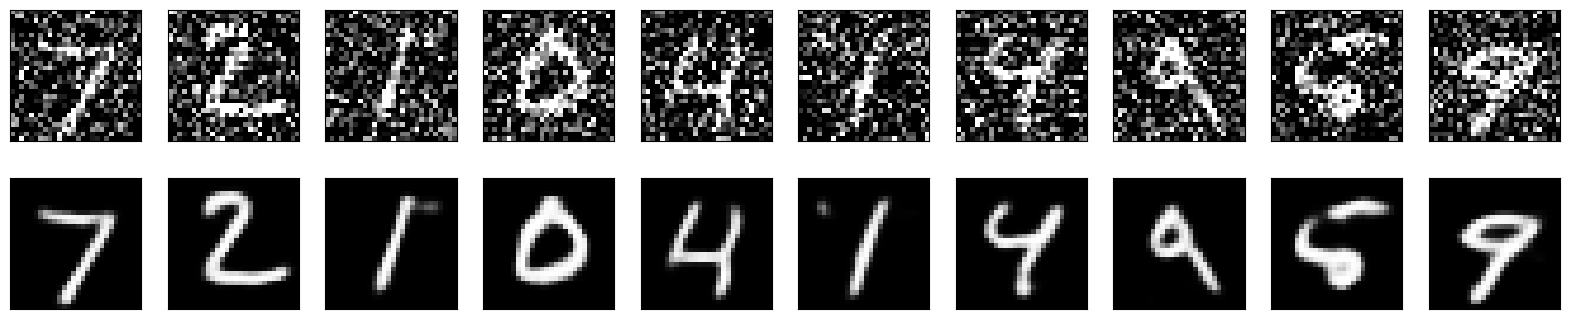

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Dataset Preparation
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Model Architecture
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Model Training
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Model Evaluation
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualization
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##    Challenges: Discuss challenges encountered during training, especially regarding sparsity constraints and denoising.
##    Analysis: Analyze the quality of reconstructed images and the effectiveness of the autoencoder in removing noise and preserving features.
##   Improvements: Reflect on potential improvements or alternative approaches for enhancing reconstruction performance.